# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [26]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [11]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0     (2.0166753389049052, 0.3648249354171793)
1      (1.461728575377334, 0.4814926620225374)
2    (0.22163160037823468, 0.8951036116607112)
3     (3.729783259066368, 0.15491299696907593)
4    (0.41064063088692965, 0.8143864140827441)
dtype: object

#### Interpret the normaltest results and make your observations.

La función stats.normaltest devuelve una tupla de dos valores. El primero es el estadístico chi-cuadrado y el segundo el valor p asociado. 
Dada la hipótesis nula de que x viene de una distribución normal, el valor p representa la probabilidad de que un estadísitico chi-cuadrado así de grande o más sea observado en la distribución. Si el p valor es muy pequeño, significa que es poco probable que los datos procedan de una distribución normal.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

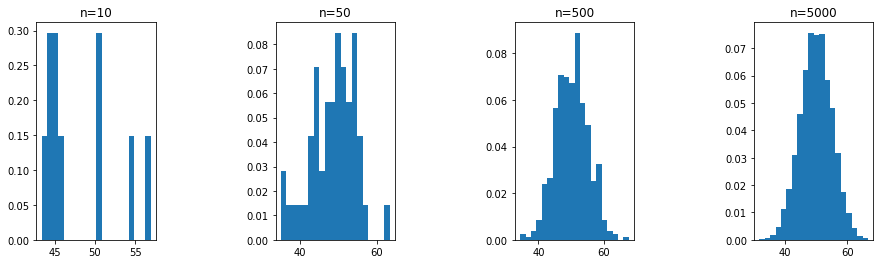

In [18]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

El teorema del límite central o teorema central del límite indica que, en condiciones muy generales, si Sn es la suma de n variables aleatorias independientes y de varianza no nula pero finita, entonces la función de distribución de Sn «se aproxima bien» a una distribución normal (también llamada distribución gaussiana, curva de Gauss o campana de Gauss). Así pues, el teorema asegura que esto ocurre cuando la suma de estas variables aleatorias e independientes es lo suficientemente grande.

Como puede verse en los gráficos, cuanto mayor es el tamaño de la muestra, más se aproxima su histograma a la distribución normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

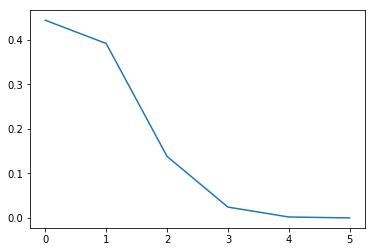

In [20]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n + 1)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

Como la probabilidad de pinchar en el anuncio es relativamente baja, vemos que la probabilidad de que nadie haya visto el anuncio es el caso más probable. La probabilidad sigue siendo alta para el caso en que solo haya sido visto por una persona, y a partir de ahí va bajando drásticamente, de manero que es muy improbable que el anuncio haya sido visto por las cinco personas (para verse el caso de cinco personas, he modificado el código de range(n) a range(n+1).

#### Now plot PMP with 50, 500, and 5000 visitors.

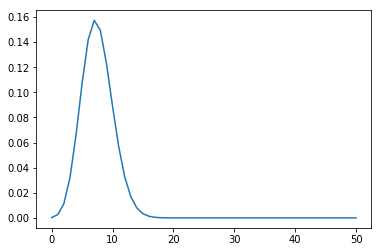

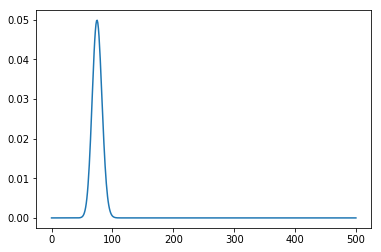

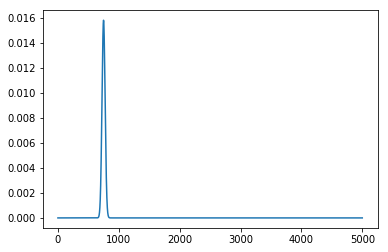

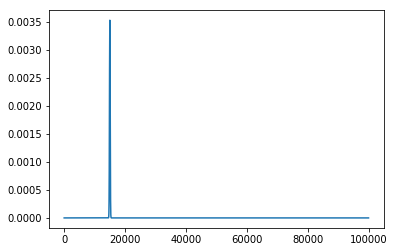

In [24]:
ns, p = [50, 500, 5000, 100000], 0.15

for n in ns:
    x = range(n + 1)
    dist = binom(n, p)
    fig, ax = plt.subplots(1, 1)
    plt.plot(x, dist.pmf(x))
    plt.show()

#### What did you notice from the distribution plots? Comment your findings.

El espectro de visitantes en el que se aprecia el pico de probabilidad relativamente alta se va estrechando según aumenta el número de visitantes. Al mismo tiempo se observa que la probabilidad baja. Se ha añadido un cuarto caso extra extremo para ver con más claridad ese pico.


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

En teoría de probabilidad y estadística, la distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos "raros".

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

La probabilidad de 320 es:  0.011612348610402475


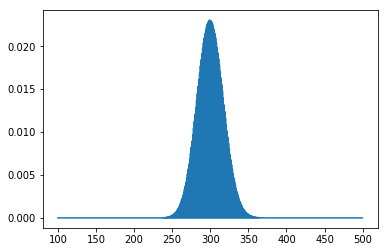

In [32]:
mu = 300
x = np.arange(100, 500, 0.5)

plt.plot(x, poisson.pmf(x, mu))

print("La probabilidad de 320 es: ", poisson.pmf(320, 300))

#### What is the probability of getting 60 visits?

In [33]:
print("La probabilidad de 60 es: ", poisson.pmf(60, 300))

La probabilidad de 60 es:  2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

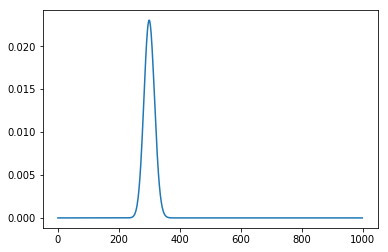

In [34]:

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)